# Euler implicito

$$ w_{i+1} = w_i + hf(t_{i+1,w_{i+1}) $$

In [16]:
# f(t,y) = y
# w_{i+1} = w_i/(1-h)
N = 5
h = 1/N
t = linspace(0, 1, N+1)
y0 = 1
w = zeros(N+1)
w[1] = y0
for i = 1:N
    w[i+1] = w[i]/(1-h)
end

In [22]:
# Retornando t e w para plotar
function euler_explicito(f, t0, y0, tf; n = 10)
    t = linspace(t0, tf, n+1) # ou t = 0.0:h:1.0
    w = zeros(n+1) # Vetor
    w[1] = y0
    h = (tf-t0)/n

    for i = 1:n
        w[i+1] = w[i] + h*f(t[i],w[i])
    end

    return t, w
end

euler_explicito (generic function with 1 method)

In [17]:
using Winston

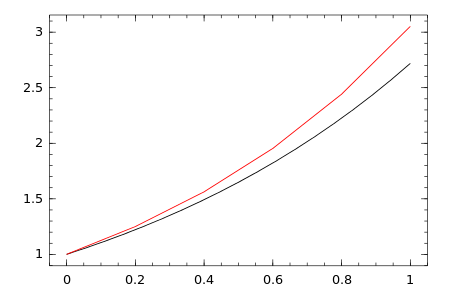

In [18]:
fplot(exp, [0, 1])
oplot(t, w, "r")

In [20]:
# Retornando t e w para plotar
function euler_implicito(f, t0, y0, tf; n = 10)
    t = linspace(t0, tf, n+1) # ou t = 0.0:h:1.0
    w = zeros(n+1) # Vetor
    w[1] = y0
    h = (tf-t0)/n

    for i = 1:n
        ψ(x) = w[i] + h*f(t[i+1],x)
        w[i+1] = w[i]
        θ = Inf
        while abs(w[i+1] - θ) > 1e-4
            θ = w[i+1]
            w[i+1] = ψ(θ)
        end
    end

    return t, w
end

euler_implicito (generic function with 1 method)

In [26]:
f(t,y) = y
t0 = 0
y0 = 1
tf = 1
y(t) = exp(t)
# Quero y(1)
# Solucao: y(t) = exp(t)
teuler, weuler = euler_explicito(f, t0, y0, tf, n = 100);
println("y(1) ≈ $(weuler[end])")
println("Eeuler = $(y(1) - weuler[end])")
timpl, wimpl = euler_implicito(f, t0, y0, tf, n = 100);
println("y(1) ≈ $(wimpl[end])")
println("Eimpl = $(y(1) - wimpl[end])")

y(1) ≈ 2.704813829421526
Eeuler = 0.013467999037519274
y(1) ≈ 2.7319935897549916
Eimpl = -0.013711761295946534


In [42]:
# Retornando t e w para plotar
function euler_explicito(f, t0, y0, tf; n = 10)
    t = linspace(t0, tf, n+1) # ou t = 0.0:h:1.0
    if length(y0) == 1
        w = zeros(n+1) # Vetor
    else
        w = zeros(n+1,length(y0))
    end
    w[1,:] = y0
    h = (tf-t0)/n

    for i = 1:n
        w[i+1,:] = w[i,:][:] + h*f(t[i],w[i,:])
    end

    return t, w
end

euler_explicito (generic function with 1 method)

In [44]:
# Sistema dinamico
# x' = -y
# y' = x
# f(x,y,t) = -y
# g(x,y,t) = x
f(t,Y) =[-Y[2]; Y[1]]
Y0 = [1.0; 1.0]
t0 = 0
tf = 1

1

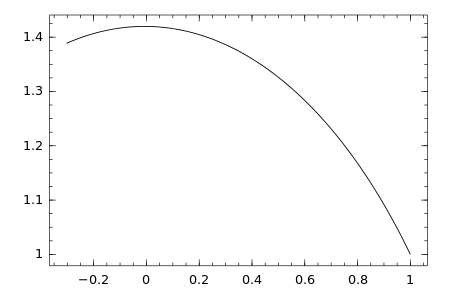

In [47]:
t, W = euler_explicito(f, t0, Y0, tf; n = 100);
plot(W[:,1], W[:,2])

In [ ]:
x =